In [429]:
import sys, os
sys.path.append('../..')

import numpy as np
import matplotlib.pyplot as plt
from tqdm import *

from simulation.units import *
from simulation.population_sim import LensingObservationWithSubhalos, SubhaloPopulation

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Single image

Text(0, 0.5, '$\\theta_y$ [arcsec]')

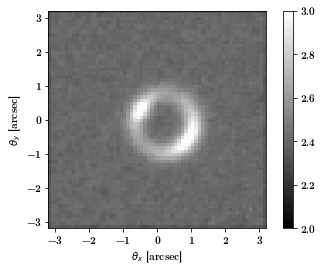

In [517]:
# Generate single lensing sample
# Fix source parameters and consider only spherical hosts
lo = LensingObservationWithSubhalos(m_200_min_sub=1e7 * M_s, m_200_max_sub_div_M_hst=0.01,
                                        beta=-1.5, f_sub=0.05,
                                        m_min_calib=1e7 * M_s, m_max_sub_div_M_hst_calib=0.01,
                                        calculate_msub_derivatives=True
)

v_min = 2.
v_max = 3.

plt.imshow(np.log10(lo.image_poiss_psf),
        vmin=v_min,
        vmax=v_max,
        cmap='gist_gray',
        extent=(-lo.coordinate_limit, lo.coordinate_limit,-lo.coordinate_limit, lo.coordinate_limit),
        origin="lower"
)
plt.colorbar()

plt.xlabel(r"$\theta_x$ [arcsec]")
plt.ylabel(r"$\theta_y$ [arcsec]")

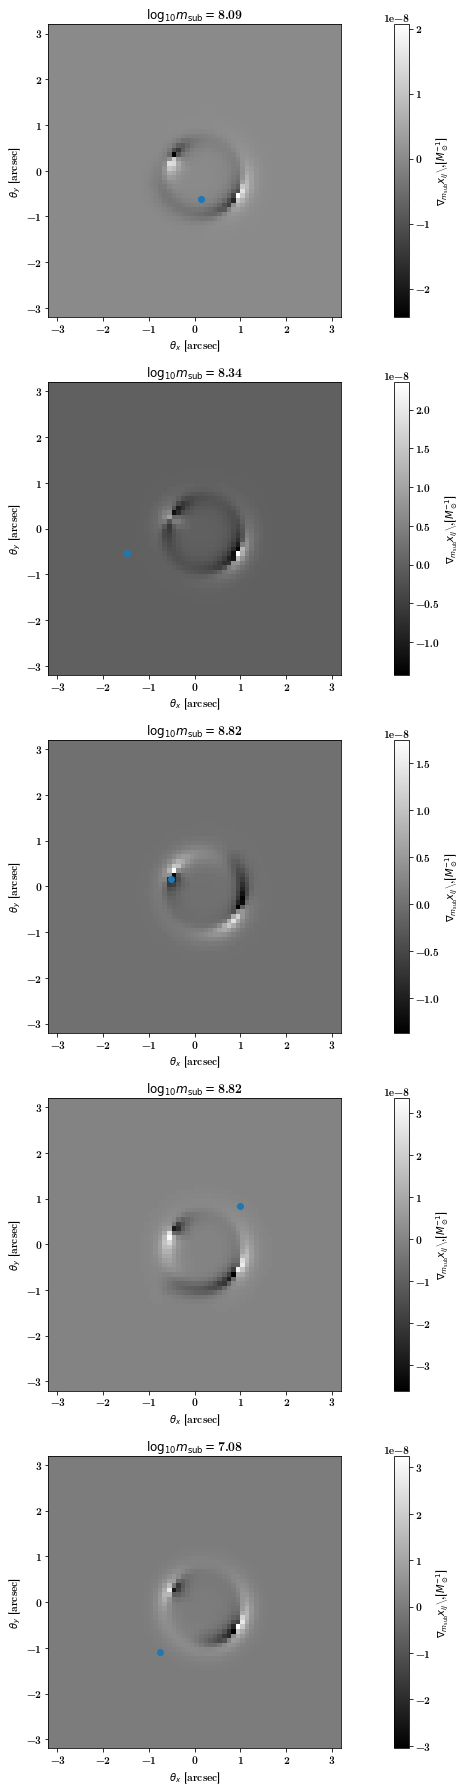

In [521]:
n_mc = lo.n_sub_roi

f, ax = plt.subplots(int(n_mc), figsize=(15, 5 * n_mc))

for i_mc in range(n_mc):
        
    im = ax[i_mc].imshow(lo.grad_msub_image[i_mc] * M_s,
            cmap='gist_gray',
            extent=(-lo.coordinate_limit, lo.coordinate_limit,-lo.coordinate_limit, lo.coordinate_limit),
            origin="lower"
    )

    ax[i_mc].scatter([lo.theta_xs[i_mc]], [lo.theta_ys[i_mc]])
    plt.colorbar(im,ax=ax[i_mc], label=r"$\nabla_{m_\mathrm{sub}}x_{ij}$\,[$M_\odot^{-1}$]")
    
    ax[i_mc].set_title(r"$\log_{10}m_\mathrm{sub} =$" + str(np.log10(lo.m_subs[i_mc] / M_s))[:4])
    ax[i_mc].set_xlabel(r"$\theta_x$ [arcsec]")
    ax[i_mc].set_ylabel(r"$\theta_y$ [arcsec]")

plt.tight_layout()